In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [81]:
df.shape

(20800, 5)

In [82]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [83]:
df=df.dropna().reset_index(drop=True)
df.shape
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [84]:
X=df.drop(['label','id'],axis=1)
y=df['label']

In [85]:
X.shape

(18285, 3)

In [86]:
X

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [87]:
y

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [88]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [89]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [90]:
voc_size=5000


In [91]:
messages=X.copy()
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [92]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
  

In [94]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous donor pay 

In [95]:
one_hot_represenation=[one_hot(words,voc_size) for words in corpus]
one_hot_represenation

[[4605, 2364, 3243, 1364, 1060, 2449, 4120, 1849, 2823, 1234],
 [2408, 2663, 1098, 1759, 4213, 4486, 2416],
 [4188, 21, 1207, 2169],
 [437, 4648, 4084, 1341, 1634, 1861],
 [3383, 4213, 484, 4756, 1316, 367, 4213, 4238, 1591, 840],
 [4367,
  339,
  4441,
  1247,
  3567,
  4874,
  3526,
  2771,
  2320,
  2285,
  2287,
  4958,
  1035,
  2169,
  2416],
 [1204, 802, 2371, 1206, 3210, 2172, 1097, 1776, 3443, 598, 4703],
 [3424, 2725, 3481, 933, 3498, 765, 4874, 4570, 3443, 598, 4703],
 [4439, 4702, 3657, 1615, 2852, 2899, 1130, 3722, 4874, 797],
 [2030, 1548, 2210, 2375, 1084, 2943, 2987, 3745],
 [301, 2361, 652, 1918, 2673, 1174, 1565, 660, 1464, 2925, 126],
 [1341, 2638, 1060, 93, 4874, 3498],
 [2438, 4405, 131, 3926, 441, 3121, 1820, 3715, 1678],
 [3058, 4392, 1032, 3714, 1081, 1573, 2794, 3443, 598, 4703],
 [3541, 716, 963, 733, 4336, 3443, 598, 4703],
 [2500, 1008, 491, 1432, 4481, 916, 4637, 4697, 2232, 362],
 [2164, 4497, 2663],
 [2036, 4310, 157, 4763, 4874, 1197, 3303, 2416],
 [1994

In [96]:
sent_length=15
embedded_docs=pad_sequences(one_hot_represenation,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1849 2823 1234]
 [   0    0    0 ... 4213 4486 2416]
 [   0    0    0 ...   21 1207 2169]
 ...
 [   0    0    0 ... 3443  598 4703]
 [   0    0    0 ...  618  588 2914]
 [   0    0    0 ... 3027 3504  531]]


In [97]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [98]:
embedded_docs.dtype
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=20)

In [117]:
### Finally Training
model_history=model.fit(X_train,y_train,validation_split=0.33,epochs=10,batch_size=64)
y_pred=model.predict_classes(X_test)


Epoch 1/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9989 - val_loss: 0.0081 - val_accuracy: 0.9970
Epoch 2/10
129/129 [==============================] - 1s 8ms/step - loss: 8.5353e-04 - accuracy: 0.9998 - val_loss: 0.0183 - val_accuracy: 0.9941
Epoch 3/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0131 - val_accuracy: 0.9955
Epoch 4/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0113 - val_accuracy: 0.9958
Epoch 5/10
129/129 [==============================] - 1s 8ms/step - loss: 5.3887e-04 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 6/10
129/129 [==============================] - 1s 8ms/step - loss: 7.6179e-04 - accuracy: 0.9999 - val_loss: 0.0202 - val_accuracy: 0.9946
Epoch 7/10
129/129 [==============================] - 1s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0258 - val_accuracy: 0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [118]:
model.metrics_names

['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


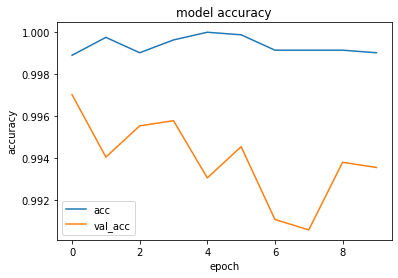

In [121]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'],label='acc')
plt.plot(model_history.history['val_accuracy'],label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


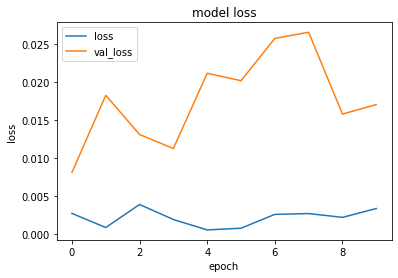

In [122]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()


In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[3107  255]
 [ 316 2357]]


In [124]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9053852526926264


In [125]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3362
           1       0.90      0.88      0.89      2673

    accuracy                           0.91      6035
   macro avg       0.91      0.90      0.90      6035
weighted avg       0.91      0.91      0.91      6035

